# Answer Key for HW03: Key probability theory concepts and empirical probabilities computed for Central Park

## ⚠️⚠️⚠️ TOTAL POINTS POSSIBLE: 72 ⚠️⚠️⚠️

## Preliminaries

### Import needed python packages

In [1]:
from matplotlib import pyplot as plt  # for plotting
import numpy as np # for working with arrays of numerical values
import scipy  # for various scientific calculations
import xarray as xr  # for loading data and subsequent analyses

### Load the Central Park data

In [2]:
!pip install pooch

# The above command installs the needed `pooch` 3rd-party package if it's not already installed.


import hashlib  # for verifying that the Central Park file is not corrupted
import pathlib  # for constructing paths to the dataset's location on disk
import sys  # for checking if this is a Google Colab session or not
import pooch  # for downloading the dataset from the web, if needed


# Replace "../data" as needed to point to the correct directory for you.
# This can be an *absolute path* or a *relative path*.  One dot, `.`, means
# "this directory", while two dots, `..`, means "go up one directory."
LOCAL_DATA_DIR = "../data"  # If you're in Colab: just ignore this.

# The URL where the dataset can be downloaded from.
DATA_URL = (
    "https://spencerahill.github.io/25f-stat-methods-course/_downloads/"
    "91803b82950d49961a65355c075439b3/central-park-station-data_1869-01-01_2023-09-30.nc"
)

# This HASH_HEX stores a "hash" which we use to verify that the data you end up
# with has not been altered or corrupted compared to the one at the above URL.
HASH_HEX = "85237a4bae1202030a36f330764fd5bd0c2c4fa484b3ae34a05db49fe7721eee"


def create_data_path(
    colab_dir="/content/data", 
    local_dir=LOCAL_DATA_DIR,
    filename="central-park-station-data_1869-01-01_2023-09-30.nc",
):
    """Set the path for the data, whether on colab or a local Jupyter session."""
    is_this_a_colab = "google.colab" in sys.modules
    if is_this_a_colab:
        data_dir = colab_dir 
    else: 
        data_dir = local_dir

    DATA_DIR = pathlib.Path(data_dir)
    DATA_DIR.mkdir(parents=True, exist_ok=True)
    return DATA_DIR / filename


def sha256sum(path: pathlib.Path) -> str:
    """Get the hash of the file at the specified path."""
    return hashlib.sha256(path.read_bytes()).hexdigest()


DATA_PATH = create_data_path()
# Determine if we'll need to download the data, which we'll do if either (a) 
# the data can't be found, or (b) it appears corrupted/modified from the
# "master" file at the above URL.
need_fetch = (not DATA_PATH.exists()) or (sha256sum(DATA_PATH) != HASH_HEX)

# Download the data if needed.
if need_fetch:
    fetched_data = pooch.retrieve(
        url=DATA_URL, 
        known_hash=f"sha256:{HASH_HEX}",
        path=DATA_PATH.parents[0], 
        fname=DATA_PATH.name,
    )
    print(f"\nDownloaded and verified: {fetched_data}")
else:
    print(f"\nVerified existing file at {DATA_PATH}")

Looking in links: https://pypi.python.org/pypi, https://testpypi.python.org/pypi

Verified existing file at ../data/central-park-station-data_1869-01-01_2023-09-30.nc


In [3]:
import xarray as xr

# `DATA_PATH` variable was created by the hidden cell just above. 
# Un-hide that cell if you want to see the details.
ds_cp = xr.open_dataset(DATA_PATH)
ds_cp

<xarray.Dataset> Size: 5MB
Dimensions:        (time: 56520)
Coordinates:
  * time           (time) datetime64[ns] 452kB 1869-01-01 ... 2023-09-30
Data variables:
    temp_max       (time) int64 452kB ...
    temp_min       (time) int64 452kB ...
    temp_avg       (time) float64 452kB ...
    temp_anom      (time) float64 452kB ...
    heat_deg_days  (time) int64 452kB ...
    cool_deg_days  (time) int64 452kB ...
    precip         (time) float64 452kB ...
    snow_fall      (time) float64 452kB ...
    snow_depth     (time) int64 452kB ...

## Sets and probabilities

### ⚠️ POINTS: 24 
2 points per question: 1 for the answer and 1 for the explanation

### ✅ ANSWERS
#### If $E_1=\{1,2,3\}$ and $E_2=\{3,1,2\}$, what's the relationship between $E_1$ and $E_2$?

They are identical: $E_1=E_2$.  For sets, the order of elements is meaningless.

#### What is $\{1, 3, 5\}\cup\{1,2,3\}$?
$\{1, 2, 3, 5\}$, because the union of two sets includes every element that shows up in either or both.

#### What is $\{1, 3, 5\}\cap\{1,2,3\}$?
$\{1, 3\}$, because the intersection of two sets includes only those elements that are in both sets.

#### Consider a single roll of a fair, standard 6-sided dice.  Is the event {roll a 1, roll a 6} a simple event?
No, it is a compound event, because it is the union of two simple events, namely {roll a 1} and {roll a 6}.

#### If some outcome is impossible, does that mean it can't be a valid event?  (Provide an example.)
No.  For a standard six-sided dice, it's impossible to roll a 7, but {roll a 7} is still a valid event, in terms of being permissible to define.

#### What is the sample space of three consecutive coin flips?  (Use H to denote Heads and T to denote tails.)
$$\boxed{\{HHH, HHT, HTH, THH, HTT, THT, TTH, TTT\}}$$

The sample space consists of every possible outcome.  For three consecutive coin flips, there are eight possible outcomes as listed above.

#### If $S_1$ and $S_2$ are sets, and $S_1\subseteq S_2$, what is $S_1\cup S_2$?
$$\boxed{S_2}$$

By definition of a subset, every element in $S_1$ is also in $S_2$, so the union of the two will simply be $S_2$.

#### If $S_1$ and $S_2$ are sets, and $S_1\subseteq S_2$, what is $S_1\cap S_2$?
$$\boxed{S_1}$$

By definition of a subset, every element in $S_1$ is also in $S_2$, so the intersection of the two will be only those elements that are in $S_1$.

#### What is $P((E_1\cup E_2)^C)$?  (The Venn diagram graphical depiction of the sample space is helpful here.)

(This and the subsequent one amount to expressions of [De Morgan's Laws](https://en.wikipedia.org/wiki/De_Morgan%27s_laws) of formal logic as applied to probabilities.)

$$\boxed{1-P(E_1)-P(E_2)+P(E_1\cap E_2)}$$

The probability of the complement of an event is one minus the probability of that event, so $P((E_1\cup E_2)^C)=1-P(E_1\cup E_2)$.  And the probability of a union of two events $E_1$ and $E_2$ is $P(E_1)+P(E_2)-P(E_1\cap E_2)$.  Combining those leads to the answer.

#### What is $P((E_2\cap E_1)^C)$?
$$\boxed{1+P(E_1)+P(E_2)-P(E_1\cup E_2)}$$

The probability of the complement of an event is one minus the probability of that event, so $P((E_1\cap E_2)^C)=1-P(E_1\cap E_2)$.  And the probability of the intersection of two events $E_1$ and $E_2$ is $P(E_1\cap E_2)-P(E_1)-P(E_2)$.  Combining those leads to the answer.

#### Suppose you know $P(E_1|E_2)$, $P(E_1)$, and $P(E_2)$.  What is $P(E_2|E_1)$ in terms of those three quantities?
(This is [Bayes' Theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem))

$$\boxed{\frac{P(E_2)P(E_1|E_2)}{P(E_1)}}$$

The conditional probability of $E_1$ given $E_2$ is $P(E_1|E_2)=P(E_1\cap E_2)/P(E_2)$, and the conditional probability of $E_2$ given $E_1$ is $P(E_2|E_1)=P(E_1\cap E_2)/P(E_1)$.  Multiplying the first on both sides by $P(E_2)$ and the second on both sides by $P(E_1)$ yields $P(E_2)P(E_1|E_2)=P(E_1\cap E_2)=P(E_1)P(E_2|E_1)$.  Dividing by $P(E_1)$ then yields the answer above.  

#### Can two events (each with nonzero probability) that are independent also be mutually exclusive?

$$\boxed{\textrm{No}}$$  

If they are independent, by definition they do not influence one another, whereas if they are mutually exclusive, then if one occurs the other cannot, meaning that they do influence one another.

## Empirical probabilities in the Central Park dataset

For **each** of the following probabilities:

1. P(daily average temperature > 70°F)
2. P(daily average temperature > 70°F | the day is in July)
3. P(daily average temperature > 70°F | the day is in January)
4. P(snow fall > 0")
5. P(snow fall > 0" | the day is in January or February)
6. P(temp_anom *magnitude* exceeds 5°F)
7. P(temp_anom *magnitude* exceeds 5°F | the day is a Wednesday)
8. P(daily minimum temperature < 32°F) 
9. P(daily minimum temperature < 32°F | year is 1901-1930)
10. P(daily minimum temperature < 32°F | year is 1991-2020)
11. P(precip > 5")
12. P(precip > 5" | the day is in September)

...do **each** of the following:
- [ ] Compute the empirical probability using the Central Park dataset.  Include the code you used to compute it as well as the actual result.
- [ ] Describe in 1-2 sentences your interpretation.

### ⚠️ POINTS: 36
12 questions, 2 pts each for the calculation and 1 pt for the interpretation

### ✅ ANSWERS

In [4]:
def emp_prob(arr, cond, do_print=True):
    """Compute empirical probability of the specified condition."""
    cond_where_valid = cond.where(~np.isnan(arr), drop=True)
    num_numer = cond_where_valid.sum().values
    num_denom = len(cond_where_valid)
    ans = num_numer / num_denom
    if do_print:
        print(f"{num_numer} / {num_denom} = {ans}")
    return ans

#### P(daily average temperature > 70°F)

In [5]:
t_av = ds_cp["temp_avg"]

In [6]:
emp_prob(t_av, t_av > 70)

13401.0 / 56520 = 0.23710191082802548


np.float64(0.23710191082802548)

Over the past roughly 155 years according to the Central Park weather station data, just under 1 in 4 days has a daily average temperature exceeding 70F.

#### P(daily average temperature > 70°F | the day is in July)

In [7]:
t_av_july = t_av.where(t_av["time"].dt.month == 7, drop=True)
emp_prob(t_av_july, t_av_july > 70)

4237.0 / 4805 = 0.8817898022892819


np.float64(0.8817898022892819)

This is over 3.7 times larger than the unconditional probability that includes all months of the year.  July is summer, so this makes sense.

#### P(daily average temperature > 70°F | the day is in January)

In [8]:
t_av_jan = t_av.where(t_av["time"].dt.month == 1, drop=True)
emp_prob(t_av_jan, t_av_jan > 70)

0.0 / 4805 = 0.0


np.float64(0.0)

There has never been a day recorded in January exceeding 70F for its daily average.  This makes sense; January is the winter, and even very mild January days do not typically get above even 60F at their peak.

#### P(snow fall > 0")

In [9]:
snow = ds_cp["snow_fall"]
emp_prob(snow, snow > 0)

2169.0 / 54216 = 0.0400066401062417


np.float64(0.0400066401062417)

4% of days year-round have gotten nonzero snowfall.  (Note that snow fall has some missing data with NaN values; if you do not exclude those, your computed probability will be too high.)

#### P(snow fall > 0" | the day is in January or February)

In [10]:
is_jan_feb = ds_cp["time"].dt.month.isin([1, 2])
snow_jan_feb = snow.where(is_jan_feb, drop=True)
emp_prob(snow_jan_feb, snow_jan_feb > 0)

1225.0 / 8147 = 0.1503620964772309


np.float64(0.1503620964772309)

15% of January and February days have gotten nonzero snow.  This is almost 4 times larger than the probability across all months computed above.  Indeed, most of New York City's snow falls in winter, though the other winter half-year months also get a little:

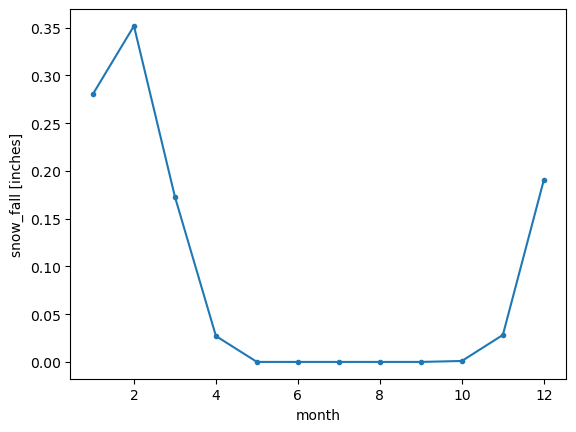

In [11]:
ds_cp["snow_fall"].groupby("time.month").mean().plot(marker=".")

#### P(temp_anom *magnitude* exceeds 5°F)

In [12]:
t_anom = ds_cp["temp_anom"]
emp_prob(t_anom, np.abs(t_anom) > 5)

28288.0 / 56520 = 0.5004953998584571


np.float64(0.5004953998584571)

Roughly half of the time, the daily temperature is more than 5F cooler or warmer than the long term average for that day.

#### P(temp_anom *magnitude* exceeds 5°F | the day is a Wednesday)

In [13]:
is_wednesday = ds_cp["time"].dt.dayofweek == 2  # 0=Monday, 1=Tuesday, etc.
t_anom_wed = t_anom.where(is_wednesday, drop=True)
emp_prob(t_anom_wed, np.abs(t_anom_wed) > 5)

4066.0 / 8074 = 0.5035917760713401


np.float64(0.5035917760713401)

This is nearly unchanged from the unconditonal probability above including all days of the week.  This makes sense: days of the week are a human construct that the real atmosphere doesn't actually care about.  In other words, the temperature anomaly and the day of the week are *independent*.

(It's *possible* that on weekdays there would be more traffic, activity, etc. that would generate more heat, but this is probably small, and also that would act to reduce cold anomalies as well as increase warm anomalies.  And indeed, as shown below, the percentage is virtually identical across the days of the week.)

In [14]:
for dayofweek in range(6):
    is_this_day = ds_cp["time"].dt.dayofweek == dayofweek
    t_anom_this_day = t_anom.where(is_this_day, drop=True)
    emp_prob(t_anom_this_day, np.abs(t_anom_this_day) > 5)

4041.0 / 8074 = 0.5004954173891504
4036.0 / 8074 = 0.49987614565271243
4066.0 / 8074 = 0.5035917760713401
4033.0 / 8074 = 0.4995045826108496
4071.0 / 8075 = 0.5041486068111455
4029.0 / 8075 = 0.49894736842105264


#### P(daily minimum temperature < 32°F) 

In [15]:
t_min = ds_cp["temp_min"]
emp_prob(t_min, t_min < 32)

11535.0 / 56520 = 0.20408704883227177


np.float64(0.20408704883227177)

Roughly 1 in 5 days has dropped below freezing at some point.

#### P(daily minimum temperature < 32°F | year is 1901-1930)

In [16]:
emp_prob(t_min, t_min.sel(time=slice("1901", "1930")) < 32)

2395.0 / 10957 = 0.21858172857533997


np.float64(0.21858172857533997)

In the first 3 decades of the 20th century, slightly more days dropped below freezing than the long-term average; 21.8% vs. 20.4%.  Whether this difference is statistically significant, however, we do not know from this calculation alone.

#### P(daily minimum temperature < 32°F | year is 1991-2020)

In [17]:
emp_prob(t_min, t_min.sel(time=slice("1991", "2020")) < 32)

1836.0 / 10958 = 0.16754882277787916


np.float64(0.16754882277787916)

The fraction of days dropping below freezing is considerably lower in the more recent 30 year period of 1991-2020, at 16.8%.  This larger difference is more likely to be statistically significant, although again we don't know for sure without performing a formal hypothesis test.  It is definitely possible that the long-term warming trend in New York City is a predominant driver of this decrease in freezing days.

#### P(precip > 5")

In [18]:
precip = ds_cp["precip"]
emp_prob(precip, precip > 5)

10.0 / 56520 = 0.00017692852087756547


np.float64(0.00017692852087756547)

Five inches of (equivalent liquid) precipitation is extremely rare, occuring less than 0.018% of days.

#### P(precip > 5" | the day is in September)

In [19]:
prec_sep = precip.where(precip["time"].dt.month == 9, drop=True)
emp_prob(prec_sep, prec_sep > 5)

5.0 / 4650 = 0.001075268817204301


np.float64(0.001075268817204301)

Restricting to Septembers, while 0.11% is still infrequent, it is still over 6 times larger than the frequency across all months.  The historic rain event on September 29th, 2023 that inspired this question contributes to that, as did Hurricane Ida on September 1st, 2021.

September is in the heart of Atlantic hurricane season, and it is possible that this larger fraction compared to the whole year is due to a greater proclivity for hurricanes and their remnants to reach New York City.  (At the same time, the 2023 event wasn't obviously the remnants of a hurricane.)

If we do this for every month of the year, shown below, September indeed is much higher than the other months.  However, this 5" threshold is somewhat arbitrary, and so we'd need to do further analysis to be sure that indeed September is the "hot spot" of the year for extreme rainfall in NYC.

In [20]:
for month in range(1, 13):
    prec_this_month = precip.where(precip["time"].dt.month == month, drop=True)
    emp_prob(prec_this_month, prec_this_month > 5)

0.0 / 4805 = 0.0
0.0 / 4377 = 0.0
0.0 / 4805 = 0.0
1.0 / 4650 = 0.00021505376344086021
0.0 / 4805 = 0.0
0.0 / 4650 = 0.0
0.0 / 4805 = 0.0
1.0 / 4805 = 0.0002081165452653486
5.0 / 4650 = 0.001075268817204301
1.0 / 4774 = 0.00020946795140343527
2.0 / 4620 = 0.0004329004329004329
0.0 / 4774 = 0.0


Let's restrict to before 2021, to see how much Hurricane Ida and the 2023 event influence this:

In [21]:
prec_sep_pre2021 = prec_sep.where(prec_sep["time"].dt.year < 2021, drop=True)
emp_prob(prec_sep_pre2021, prec_sep_pre2021 > 5)

3.0 / 4560 = 0.0006578947368421052


np.float64(0.0006578947368421052)

Indeed, it increased by 60% going from 2020 to the present, so those two events did play a major role.  But whether those were physically more likely given the conditions in September or this was the equivalent of random dice rolls would need to be further investigated.

## Empirical PDFs and CDFs in the Central Park dataset

For **any 3** of the following variables in the Central Park daily weather dataset...
- `temp_avg` (daily average temperature)
- `temp_min` (daily minimum temperature)
- `temp_max` (daily maximum temperature)
- `temp_anom` (daily average temperature *departure* from "normal", i.e. a 30-year average)
- `heat_deg_days` ([heating degree days](https://en.wikipedia.org/wiki/Heating_degree_day))
- `cool_deg_days` ([cooling degree days](https://en.wikipedia.org/wiki/Degree_day#United_States))
- `precip` (precipitation in inches; when it's snow this is [*snow water equivalent*](https://en.wikipedia.org/wiki/Snow_science#Measurement))
- `snow_fall` (snowfall in inches that day)
- `snow_depth` (depth in inches of snow currently on the ground)

...do **each** of the following:

- [ ] Plot its histogram with `plt.hist` and with the keyword argument `density=True`.
- [ ] Experiment with the bin spacing to come up with what you feel like is the best balance between resolving fine-grained details (recall the single vs. double peak in daily average temperature) on the one hand vs. excessive *noise* on the other hand.  Include **only** the final histogram you decide on as a plot in your notebook, and in 1-3 sentences describe any salient features.
- [ ] compute and plot its empirical cumulative distribution function, and describe it in 1-2 sentences.

### ⚠️ POINTS: 12
For each of the 3 variables selected, 1 point for the histogram, 1 point for the description, 1 point for the empirical CF, and 1 point for the description

### ✅ ANSWERS: PDFs

Notice: this just uses the default number of bins and doesn't include discussion.  Use your best judgment regarding your own grading on these.

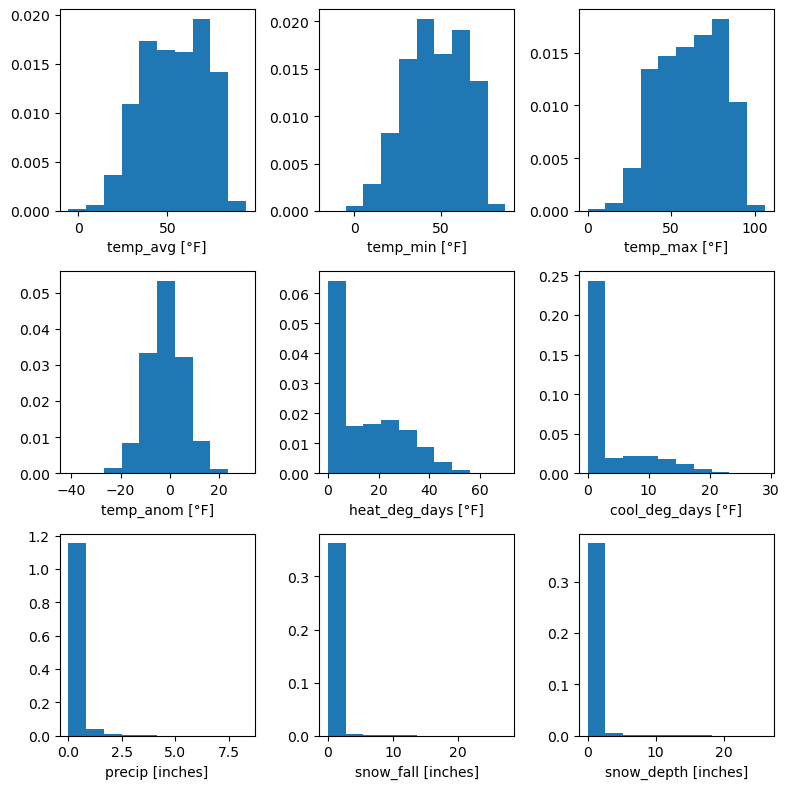

In [22]:
vars_units = {
    "temp_avg": "°F",
    "temp_min": "°F",
    "temp_max": "°F",
    "temp_anom": "°F",
    "heat_deg_days": "°F",
    "cool_deg_days": "°F",
    "precip": "inches",
    "snow_fall": "inches",
    "snow_depth": "inches",
}

fig, axarr = plt.subplots(3, 3, figsize=(8, 8))

for var, ax in zip(vars_units.keys(), axarr.ravel()):
    ds_cp[var].plot.hist(ax=ax, density=True)
    ax.set_xlabel(f"{var} [{vars_units[var]}]")

fig.tight_layout()

### ✅ ANSWERS: CDFs

Note: this doesn't include any discussion; use your best judgment when grading that part for yourself.

In [23]:
def ecdf(arr):
    """Wrapper around scipy's empirical cumulative distribution function."""
    ecdf = scipy.stats.ecdf(arr).cdf
    return ecdf.quantiles, ecdf.probabilities


def plot_ecdf(ax, quantiles, probabilities, **kwargs):
    """Plot the results of `ecdf`."""
    ax.plot(quantiles, probabilities, **kwargs)
    ax.set_xlim(np.min(quantiles) - 0.01 * np.abs(np.max(quantiles)), 
                np.max(quantiles) + 0.01 * np.abs(np.max(quantiles)))
    ax.set_ylim(-0.01, 1.01)
    ax.set_ylabel("quantile [unitless]")
    return fig, ax

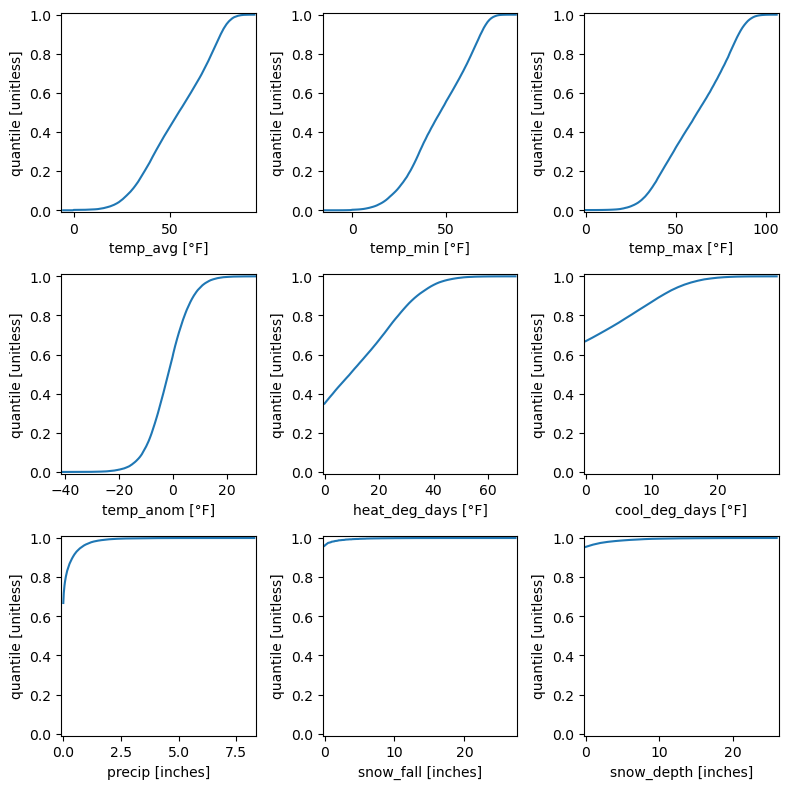

In [24]:
vars_units = {
    "temp_avg": "°F",
    "temp_min": "°F",
    "temp_max": "°F",
    "temp_anom": "°F",
    "heat_deg_days": "°F",
    "cool_deg_days": "°F",
    "precip": "inches",
    "snow_fall": "inches",
    "snow_depth": "inches",
}

fig, axarr = plt.subplots(3, 3, figsize=(8, 8))

for var, ax in zip(vars_units.keys(), axarr.ravel()):
    plot_ecdf(ax, *ecdf(ds_cp[var].dropna("time")))
    ax.set_xlabel(f"{var} [{vars_units[var]}]")

fig.tight_layout()

## Extra credit

Each extra credit option below earns you up to an extra 5% on this assignment.

### ✅ ANSWER: Explicitly compare the empirical CDFs to the integrals of your empirical PDFs

As discussed in class, the cumulative distribution function amounts to the integral of the probability density function.  This task asks you to verify that for yourself numerically.

Pick any two of the variables in the Central Park dataset.  Take the empirical PDF you generated via the histograms, and numerically integrate it using a method/package/etc. of your choosing.  Plot the result against the "true" empirical CDF you generated already.  Describe what you find in 1-2 sentences.

**Solution**: To numerically integrate the PDFs, we perform the cumulative sum of each bin's height times its weight:

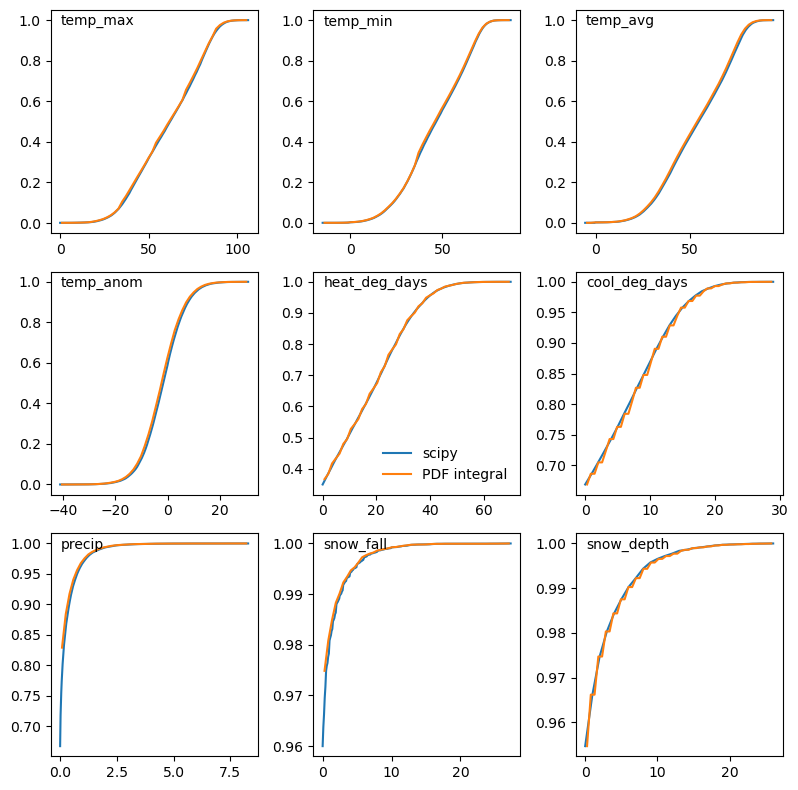

In [25]:
def integrate_pdf(arr, **kwargs):
    """Numerically integrate the PDF of a 1-D xarray.DataArray."""
    densities, bin_edges = np.histogram(
        arr.dropna(arr.dims[0]), density=True, **kwargs)
    bin_widths = bin_edges[1:] - bin_edges[:-1]
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    pdf_integral = np.cumsum(densities * bin_widths)
    return bin_centers, pdf_integral


fig, axarr = plt.subplots(3, 3, figsize=(8, 8))

for var, ax in zip(ds_cp.data_vars, axarr.ravel()):
    scipy_ecdf = scipy.stats.ecdf(ds_cp[var].dropna("time")).cdf
    ax.plot(
        scipy_ecdf.quantiles, 
        scipy_ecdf.probabilities, 
        label="scipy",
    )
    ax.plot(
        *integrate_pdf(ds_cp[var], bins=50), 
        label="PDF integral",
    )
    ax.text(
        0.05, 
        0.98, 
        var,
        transform=ax.transAxes, 
        va="top",
    )

axarr.ravel()[4].legend(frameon=False, fontsize=10, loc="lower right")
fig.tight_layout()

### ✅ ANSWER: Try out "Bayesian blocks" for your PDF bins

[Bayesian blocks](https://jakevdp.github.io/blog/2012/09/12/dynamic-programming-in-python/) is a method for choosing optimal bin sizes for histograms in which the bin sizes do not have to be uniform.  (It's much more involved than that, but that suffices for our purposes).

Return to your empirical PDFs for any two variables in the Central Park dataset.  Re-generate their histograms using the bins generated by this Bayesian blocks method.  It is implemented in the `astropy` package; see docs [here](https://docs.astropy.org/en/stable/api/astropy.stats.bayesian_blocks.html).

Compare the results to the PDFs you generated before.  Describe salient differences and/or similarities.

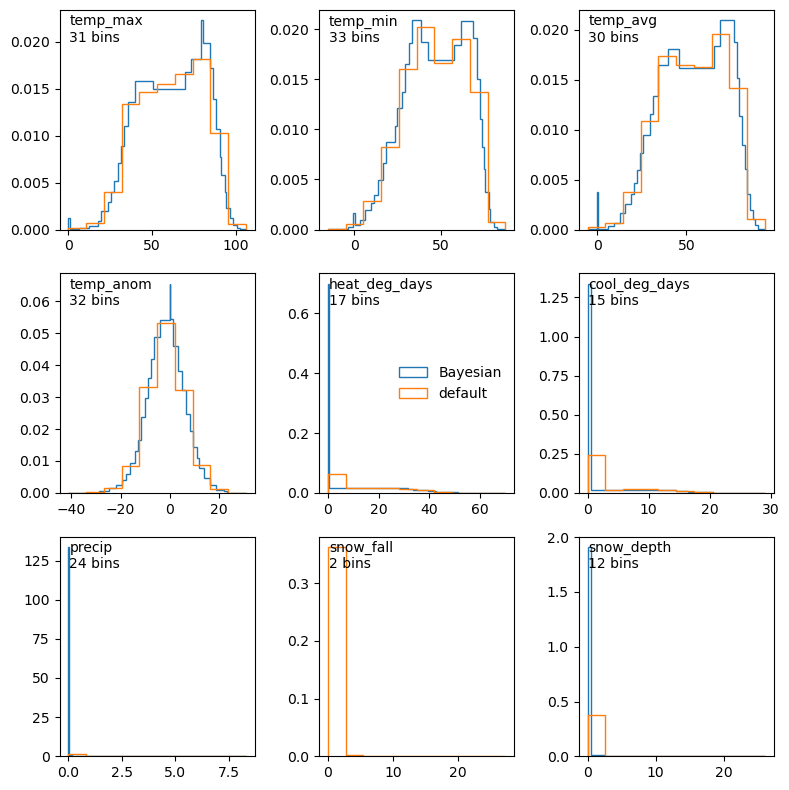

In [26]:
import astropy.stats

fig, axarr = plt.subplots(3, 3, figsize=(8, 8))

for var, ax in zip(ds_cp.data_vars, axarr.ravel()):
    bayesian_bin_edges = astropy.stats.bayesian_blocks(ds_cp[var])
    ax.hist(
        ds_cp[var], 
        bins=bayesian_bin_edges, 
        density=True,
        histtype="step",
        label="Bayesian",
    )
    ax.hist(
        ds_cp[var], 
        density=True, 
        histtype="step", 
        label="default",
    )
    ax.text(
        0.05, 
        0.98, 
        var + f"\n{len(bayesian_bin_edges)} bins", 
        transform=ax.transAxes, 
        va="top",
    )

axarr.ravel()[4].legend(frameon=False, fontsize=10, loc="center right")
fig.tight_layout()

### ✅ ANSWER: Create your own empirical CDF function

**Prompt**: That is, define a function that computes the empirical CDF value at each point in the array it is given, and does so "from scratch," meaning that it doesn't just call e.g. `scipy.stats.ecdf`.

Hint: start by sorting the array.  What's the quantile of the smallest value?  Of the 2nd smallest?  Of the largest?  

Verify that your function gives (nearly) the same results as `scipy.stats.ecdf` or another available implementation.

**Solution**: the CDF gives the quantile of each value, meaning the percentage of values that are equal to or less than that value.  So to compute the CDF, we simply sort the array's values from highest to lowest, and at each value count the number that are less than the current one.

In [27]:
def ecdf_by_hand(arr):
    """Empirical cumulative distribution function."""
    sorted = arr.sortby(arr)
    num_vals = len(sorted)
    quantiles = xr.DataArray(
        np.arange(1, num_vals + 1) / num_vals,
        coords=[sorted],
        dims=['quantile'],
    )
    return sorted, quantiles

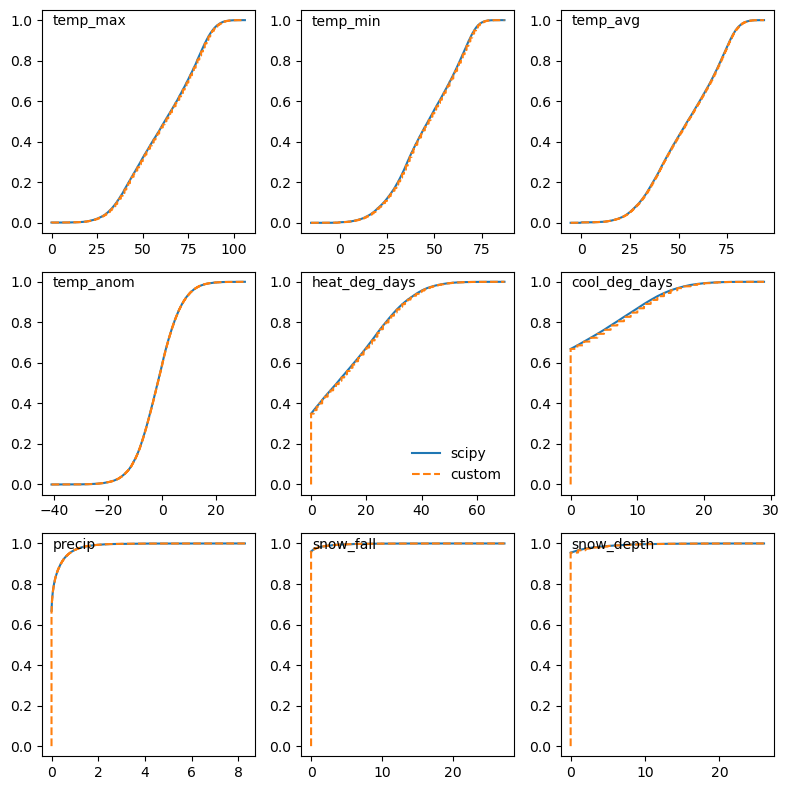

In [28]:
fig, axarr = plt.subplots(3, 3, figsize=(8, 8))

for var, ax in zip(ds_cp.data_vars, axarr.ravel()):
    scipy_ecdf = scipy.stats.ecdf(ds_cp[var].dropna("time")).cdf
    ax.plot(
        scipy_ecdf.quantiles, 
        scipy_ecdf.probabilities, 
        label="scipy",
    )
    ax.plot(
        *ecdf_by_hand(ds_cp[var].dropna("time")), 
        linestyle="--", 
        label="custom",
    )
    ax.text(0.05, 0.98, var, transform=ax.transAxes, va="top")

axarr.ravel()[4].legend(frameon=False, fontsize=10, loc="lower right")
fig.tight_layout()

### Compute some key empirical probabilities on data you're using for your final project

**Grading note: use your best judgment on what you earned for this.**

Compute and report some key empirical probabilities from the data for your final project.  Which probabilities would be *key* vs. not depends on your particular project.  For example, suppose you were using the Central Park dataset to investigate extreme snow events.  Then probabilities of snow exceeding various high thresholds would definitely be key, while probabilities of say exceeding various thresholds in maximum daily temperatures in July (when there is never any snow) would not.

This must include at least one of each of the following:

- unconditional probability of a single event
- unconditional probability of the union of two or more events
- unconditional probability of the intersection of two or more events
- one or more conditional probabilities

This is a double bonus: it gets you extra credit on this assignment *and* helps you make progress on your final project!